In [0]:
from pyspark.sql.types import *

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
9,application_1588806621538_0010,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
profile_df = spark.read.format('csv').load('s3://flightanalysis/cleaned-dataset/flight-profile/profile.csv', header=True, inferSchema=True)
profile_df.na.drop().show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-------------+-----------------+------+-----------+
|date|flight_number|flight_identifier|origin|destination|
+----+-------------+-----------------+------+-----------+
|2009|         1204|               XE|   DCA|        EWR|
|2009|         1206|               XE|   EWR|        IAD|
|2009|         1207|               XE|   EWR|        DCA|
|2009|         1208|               XE|   DCA|        EWR|
|2009|         1209|               XE|   IAD|        EWR|
|2009|         1212|               XE|   ATL|        EWR|
|2009|         1212|               XE|   CLE|        ATL|
|2009|         1214|               XE|   DCA|        EWR|
|2009|         1215|               XE|   EWR|        DCA|
|2009|         1217|               XE|   EWR|        DCA|
+----+-------------+-----------------+------+-----------+
only showing top 10 rows

#### Statistical Analysis of Flight Identifier 

In [0]:
sc.install_pypi_package("pandas==0.25.1") 
sc.install_pypi_package("plotly==3.10.0") 
sc.install_pypi_package("matplotlib", "https://pypi.org/simple") #Install matplotlib from given PyPI repository
sc.install_pypi_package("cufflinks")
sc.list_packages() 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-0.25.1-cp36-cp36m-manylinux1_x86_64.whl (10.5 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

  Using cached plotly-3.10.0-py2.py3-none-any.whl (41.5 MB)
  Using cached requests-2.23.0-py2.py3-none-any.whl (58 kB)
Processing /mnt/var/lib/livy/.cache/pip/wheels/ac/cb/8a/b27bf6323e2f4c462dcbf77d70b7c5e7868a7fbe12871770cf/retrying-1.3.3-py3-none-any.whl
  Using cached decorator-4.4.2-py2.py3-none-any.whl (9.2 kB)
  Using cached nbformat-5.0.6-py3-none-any.whl (170 kB)
  Using cached urllib3-1.25.9-py2.py3-none-any.whl (126 kB)
  Using cached idna-2.9-py2.py3-none-any.whl (58 kB)
  Using cached certifi-2020.4.5.1-py2.py3-none-any.whl (157 kB)
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
  Using cached ipython_genutils-0.2.0-py2.py3-none-any.whl (26 kB)
  Using cached jupyter_core-4.6.3-py2.py3-none-any.whl (83 kB)
  Using cached traitlets-4.3.3-py2.py3-none-any.whl (75 kB)
  Using cached jsonschema-3.2.0-py2.py3-none-any.whl (56 k

In [0]:
import plotly.plotly as py
import matplotlib
import pandas as pd

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…


The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 

Traceback (most recent call last):
  File "/tmp/1588823668522-0/local/lib/python3.6/site-packages/plotly/plotly/__init__.py", line 4, in <module>
    _chart_studio_error("plotly")
  File "/tmp/1588823668522-0/local/lib/python3.6/site-packages/_plotly_future_/__init__.py", line 49, in _chart_studio_error
    submodule=submodule
ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 




In [0]:
#Find top 10 airlines 
profile_df = profile_df.na.drop()
top_10_airlines = profile_df.groupBy("flight_identifier").count().orderBy('count', descending=True).limit(10).toPandas()

import matplotlib.pyplot as plt
plt.clf()
ax = top_10_airlines.plot.barh(x='flight_identifier', y='count')
ax.set_title("Top 10 Airlines with the most flight operations")
plt.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

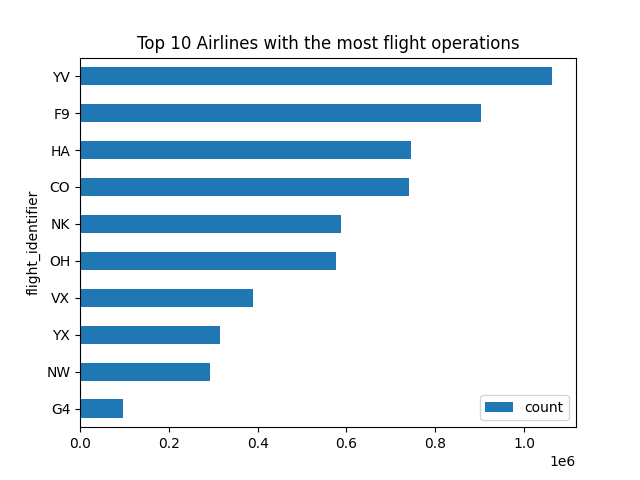

In [0]:
%matplot plt

In [0]:
# Number of flights across years
num_of_flights_by_year = profile_df.groupBy('date').count().orderBy('date').toPandas()

import matplotlib.pyplot as plt
plt.clf()
num_of_flights_by_year.plot(kind='area', x='date',y='count', rot=70, color='#bc5090', legend=None, figsize=(8,6))
plt.xticks(num_of_flights_by_year.date)
plt.xlim(2009, 2015)
plt.title('Number of flights across years')
plt.xlabel('Year')
plt.ylabel('Number of flights')

plt.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

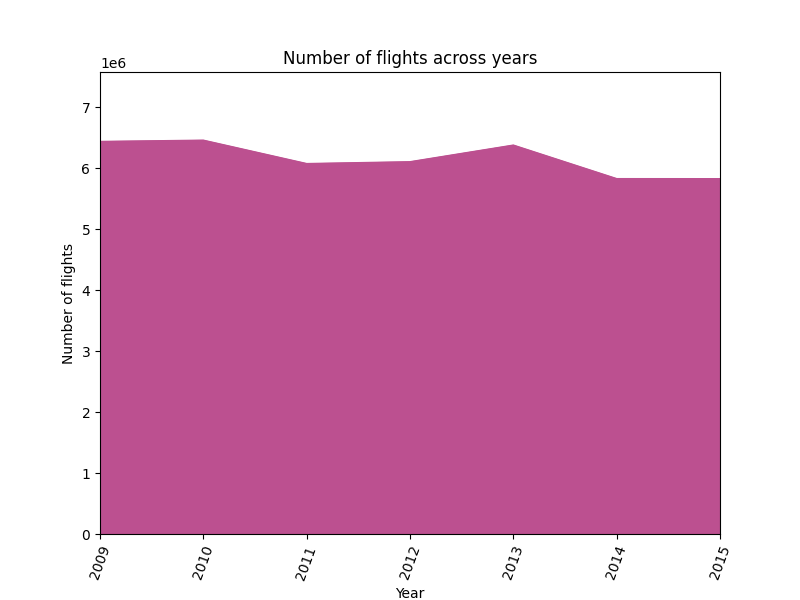

In [0]:
%matplot plt

In [0]:
#Total flight types e.g. LA -> Chi (1 flight)
profile_df.select("flight_number").describe().show() #7605 unique US domestic flights 


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----------------+
|summary|    flight_number|
+-------+-----------------+
|  count|         61556964|
|   mean|2300.241256959976|
| stddev|1886.557211293662|
|    min|                0|
|    max|             9855|
+-------+-----------------+

In [0]:
#Find famous round-trips origin-destination
print(profile_df.select("origin").distinct().count())
print(profile_df.select("destination").distinct().count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

380
378

#### Delays dataset 

In [0]:
delay_df = spark.read.format('csv').load('s3://flightanalysis/cleaned-dataset/flight-delays/delay.csv', header=True, inferSchema=True)
delay_df.dropna().show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-----------------+---------+-----------+---------+
|date|flight_identifier|plan_time|actual_time|dep_delay|
+----+-----------------+---------+-----------+---------+
|2009|               XE|     1100|     1058.0|       -2|
|2009|               XE|     1510|     1509.0|       -1|
|2009|               XE|     1100|     1059.0|       -1|
|2009|               XE|     1240|     1249.0|        9|
|2009|               XE|     1715|     1705.0|      -10|
|2009|               XE|     1915|     1913.0|       -2|
|2009|               XE|     1645|     1637.0|       -8|
|2009|               XE|     1915|     1908.0|       -7|
|2009|               XE|     1715|     1710.0|       -5|
|2009|               XE|     1300|     1255.0|       -5|
+----+-----------------+---------+-----------+---------+
only showing top 10 rows

In [0]:
delay_df.describe().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+-----------------+------------------+------------------+------------------+
|summary|              date|flight_identifier|         plan_time|       actual_time|         dep_delay|
+-------+------------------+-----------------+------------------+------------------+------------------+
|  count|          55460203|         55460203|          55460202|          54600203|          54595251|
|   mean|2013.6468720101873|             null|1327.1198931983695|1333.0986002561199| 9.182828466160911|
| stddev|3.0406649338548144|             null| 475.4810838048191| 488.2401579841335|37.528458300378006|
|    min|              2009|               9E|                 1|               1.0|              -251|
|    max|              2018|               YX|              2359|            2400.0|              2755|
+-------+------------------+-----------------+------------------+------------------+------------------+

In [0]:
ahead_of_time = delay_df.dropna().filter(delay_df.dep_delay<0)
ahead_of_time.show(2)
print("Total flights that were ahead of time", ahead_of_time.count())

delay_by_time = delay_df.dropna().filter(delay_df.dep_delay>0)
delay_by_time.show(2)
print("Total flights that were delayed", delay_by_time.count())

on_time = delay_df.dropna().filter(delay_df.dep_delay==0)
on_time.show(2)
print("Total flights that were on time",on_time.count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-----------------+---------+-----------+---------+
|date|flight_identifier|plan_time|actual_time|dep_delay|
+----+-----------------+---------+-----------+---------+
|2009|               XE|     1100|     1058.0|       -2|
|2009|               XE|     1510|     1509.0|       -1|
+----+-----------------+---------+-----------+---------+
only showing top 2 rows

Total flights that were ahead of time 31204918
+----+-----------------+---------+-----------+---------+
|date|flight_identifier|plan_time|actual_time|dep_delay|
+----+-----------------+---------+-----------+---------+
|2009|               XE|     1240|     1249.0|        9|
|2009|               XE|     1000|     1035.0|       35|
+----+-----------------+---------+-----------+---------+
only showing top 2 rows

Total flights that were delayed 20134600
+----+-----------------+---------+-----------+---------+
|date|flight_identifier|plan_time|actual_time|dep_delay|
+----+-----------------+---------+-----------+---------+
|2009| 